partially adpted from cleaning.ipynb & EDA.ipynb

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

D:\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [3]:
def load_pkl(fname):
    with open(fname, 'rb') as infile:
        return pickle.load(infile)
def save_pkl(df, fname):
    with open(fname, 'wb') as outfile:
        pickle.dump(df, outfile)
def na_percent(df):
    return df.isna().sum()/len(df)
def map_customer_id(df):
    df['customer_id'] = df['customer_id'].apply(lambda x: int(x[-16:],16) ).astype('int64')
def map_article_id(df):
    df['article_id'] = df['article_id'].astype('int32')
    # when making predictions, should convert to string and add leading 0
    # e.g. train['article_id'] = '0' + train.article_id.astype('str')
path=''

In [4]:
df_articles = pd.read_csv(path+"articles.csv")
df_customers = pd.read_csv(path+"customers.csv")

In [5]:
#df_sample_submission = pd.read_csv(path+"sample_submission.csv")

In [5]:
df_transactions_train = pd.read_csv(path+"transactions_train.csv")

## df_articles

In [6]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [7]:
map_article_id(df_articles)

In [8]:
for col in df_articles.columns:
    print(col, len(df_articles[col].unique()))

article_id 105542
product_code 47224
prod_name 45875
product_type_no 132
product_type_name 131
product_group_name 19
graphical_appearance_no 30
graphical_appearance_name 30
colour_group_code 50
colour_group_name 50
perceived_colour_value_id 8
perceived_colour_value_name 8
perceived_colour_master_id 20
perceived_colour_master_name 20
department_no 299
department_name 250
index_code 10
index_name 10
index_group_no 5
index_group_name 5
section_no 57
section_name 56
garment_group_no 21
garment_group_name 21
detail_desc 43405


In [15]:
#save_pkl(df_articles, path+"df_articles.pkl")

## df_customers

In [9]:
df_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [10]:
map_customer_id(df_customers)

In [11]:
df_customers.fashion_news_frequency = df_customers.fashion_news_frequency.apply(lambda x:'NONE' if x=='None' else x)

In [13]:
df_customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,6883939031699146327,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,-7200416642310594310,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,-6846340800584936,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,-94071612138601410,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,-283965518499174310,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [36]:
#save_pkl(df_customers, path+"df_customers.pkl")

## df_transactions_train

In [12]:
df_transactions_train.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [13]:
map_customer_id(df_transactions_train)
map_article_id(df_transactions_train)

In [14]:
df_transactions_train['t_dat'] = pd.to_datetime(df_transactions_train.t_dat)
df_transactions_train['year'] = (df_transactions_train.t_dat.dt.year-2000).astype('int8')
df_transactions_train['month'] = (df_transactions_train.t_dat.dt.month).astype('int8')
df_transactions_train['day'] = (df_transactions_train.t_dat.dt.day).astype('int8')
del df_transactions_train['t_dat']

In [15]:
df_transactions_train.head()

,customer_id,article_id,price,sales_channel_id,year,month,day
0,-6846340800584936,663713001,0.050831,2,18,9,20
1,-6846340800584936,541518023,0.030492,2,18,9,20
2,-8334631767138808638,505221004,0.015237,2,18,9,20
3,-8334631767138808638,685687003,0.016932,2,18,9,20
4,-8334631767138808638,685687004,0.016932,2,18,9,20


In [42]:
#save_pkl(df_transactions_train, path+'df_transactions_train.pkl')

## Customer analysis - 20/80 rule

In [16]:
df_transactions_groupby = df_transactions_train.groupby(['customer_id'], as_index=False).count()
df_customers = pd.merge(df_customers, df_transactions_groupby[['customer_id','article_id']], left_on=['customer_id'], right_on=['customer_id'], how='left')
df_customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,article_id
0,6883939031699146327,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,21.0
1,-7200416642310594310,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,86.0
2,-6846340800584936,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,18.0
3,-94071612138601410,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,2.0
4,-283965518499174310,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,13.0
...,...,...,...,...,...,...,...,...
1371975,7551062398649767985,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,51.0
1371976,-9141402131989464905,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,84.0
1371977,-8286316756823862684,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,45.0
1371978,2551401172826382186,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,7.0


In [17]:
df_transactions_groupby = df_transactions_train.groupby(['customer_id'], as_index=False).sum()
df_customers = pd.merge(df_customers, df_transactions_groupby[['customer_id','price']], left_on=['customer_id'], right_on=['customer_id'], how='left')
df_customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,article_id,price
0,6883939031699146327,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,21.0,0.648983
1,-7200416642310594310,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,86.0,2.601932
2,-6846340800584936,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,18.0,0.704780
3,-94071612138601410,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,2.0,0.060983
4,-283965518499174310,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,13.0,0.469695
...,...,...,...,...,...,...,...,...,...
1371975,7551062398649767985,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,51.0,1.292356
1371976,-9141402131989464905,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,84.0,1.807322
1371977,-8286316756823862684,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,45.0,0.788932
1371978,2551401172826382186,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,7.0,0.209203


In [18]:
df_customers['article_id'] = df_customers['article_id'].fillna(0)
df_customers['price'] = df_customers['price'].fillna(0)
df_customers.rename(columns={'article_id':'perchase_frequency', 'price':'total_price'},inplace=True)

In [19]:
df_customers = df_customers.sort_values(by=['total_price'], ascending=False)
df_customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,perchase_frequency,total_price
1018839,5854009424779598107,NaN,NaN,ACTIVE,NONE,31.0,67851f0456e7070c20c713fe0f47eb15bcbf2a59d13b79...,1895.0,57.676407
891429,3407358910964148684,1.0,1.0,ACTIVE,Regularly,61.0,c46e53a04e81a44fecaf0ec64ae353bfb3abc91f510e79...,1361.0,50.921186
20300,1135991499650384534,1.0,1.0,ACTIVE,Regularly,51.0,8db52856d17c197683efbc9d5ef2dc873aaf7062486b2d...,1157.0,49.967169
134476,-6466893749761682,1.0,1.0,ACTIVE,Regularly,55.0,547f17b60bc1685cc0ff69e7260e6bea1ec281fa51d163...,806.0,47.682017
969180,7398229172292340849,1.0,1.0,ACTIVE,Regularly,25.0,4acdec769091cb0bc94cfd3324843156dbc572a7281ae4...,1441.0,47.662000
...,...,...,...,...,...,...,...,...,...
988910,-8872730345030261744,1.0,1.0,ACTIVE,Regularly,53.0,5b17303593cae8bba1544d348741b81dbdc1c631badd66...,0.0,0.000000
304128,-4280122082666584064,NaN,NaN,ACTIVE,NONE,18.0,7484b7b476e28afebd23ed5f96f5bf9b59ea25dbe1ff6c...,0.0,0.000000
253321,4415134887239278817,1.0,1.0,ACTIVE,Regularly,55.0,3397ecc90991db1f5c420505f09b56ce7c962f1788aef1...,0.0,0.000000
264762,5324495867649106638,1.0,1.0,ACTIVE,Regularly,68.0,f3ea6aea4908ffd64d2769686cd91814c117a5ff6dbae3...,0.0,0.000000


In [23]:
df_customers['total_price'].sum()/4*3

663484.4805381343

In [24]:
total = 0
count = 0
for ind, row in df_customers.iterrows():
    total+=row['total_price']
    count+=1
    if total>663485:
        print(count)
        break

331986


In [25]:
331986/1371980 ##25% most valuable customers account for 75% sales

0.24197583055146576

In [15]:
df_customers['total_price'].mean() ##average amount spent

0.6447950947170341

In [16]:
df_customers['total_price'].max()

57.67640677966092

In [17]:
df_customers['total_price'].min()

0.0

In [32]:
len(df_customers[df_customers['perchase_frequency']>25])/len(df_customers) ##25% most frequent customers perchased over 25 items per person

0.2591415326754034

In [30]:
len(df_customers[df_customers['perchase_frequency']<4])/len(df_customers) ##25% least frequent customers perchased less than 3 items per person

0.2655578069651161

In [18]:
df_customers['perchase_frequency'].mean() ##average items perchased

23.16967011180921

In [19]:
df_customers['perchase_frequency'].max()

1895.0

In [20]:
df_customers['perchase_frequency'].min()

0.0

## Save data

In [20]:
df_customers['value_group'] = 'bottom75'
df_customers.loc[:331986,'value_group'] = 'top25'

In [21]:
df_customers['frequency_group'] = 'middle'
df_customers.loc[df_customers['perchase_frequency']>25,'frequency_group'] = 'top25'
df_customers.loc[df_customers['perchase_frequency']<4,'frequency_group'] = 'bottom25'

In [22]:
col = ['article_id','product_type_name','graphical_appearance_name','colour_group_name','index_name','index_group_name']
df_transactions_train = pd.merge(df_transactions_train, df_articles[col], left_on='article_id', right_on='article_id', how='left')

In [23]:
df_transactions_train = pd.merge(df_transactions_train, df_customers[['customer_id','value_group','frequency_group']], left_on='customer_id', right_on='customer_id', how='left')

In [24]:
df_transactions_train

,customer_id,article_id,price,sales_channel_id,year,month,day,product_type_name,graphical_appearance_name,colour_group_name,index_name,index_group_name,value_group,frequency_group
0,-6846340800584936,663713001,0.050831,2,18,9,20,Underwear body,Solid,Black,Lingeries/Tights,Ladieswear,top25,middle
1,-6846340800584936,541518023,0.030492,2,18,9,20,Bra,Solid,Light Pink,Lingeries/Tights,Ladieswear,top25,middle
2,-8334631767138808638,505221004,0.015237,2,18,9,20,Sweater,Melange,Pink,Divided,Divided,top25,top25
3,-8334631767138808638,685687003,0.016932,2,18,9,20,Sweater,Melange,Pink,Ladieswear,Ladieswear,top25,top25
4,-8334631767138808638,685687004,0.016932,2,18,9,20,Sweater,Melange,Dark Green,Ladieswear,Ladieswear,top25,top25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31788319,4685485978980270934,929511001,0.059305,2,20,9,22,Dress,All over pattern,Black,Divided,Divided,top25,top25
31788320,4685485978980270934,891322004,0.042356,2,20,9,22,Unknown,Solid,Black,Divided,Divided,top25,top25
31788321,3959348689921271969,918325001,0.043203,1,20,9,22,Bag,Application/3D,Black,Ladies Accessories,Ladieswear,top25,middle
31788322,-8639340045377511665,833459002,0.006763,1,20,9,22,Ring,Solid,Silver,Ladies Accessories,Ladieswear,top25,top25


In [25]:
save_pkl(df_transactions_train, path+'df_transactions_merged.pkl')

## Perchase habit - Popular items

In [4]:
df_transactions_merged = load_pkl(path+'df_transactions_merged.pkl')

There are (130,) Product Types in total


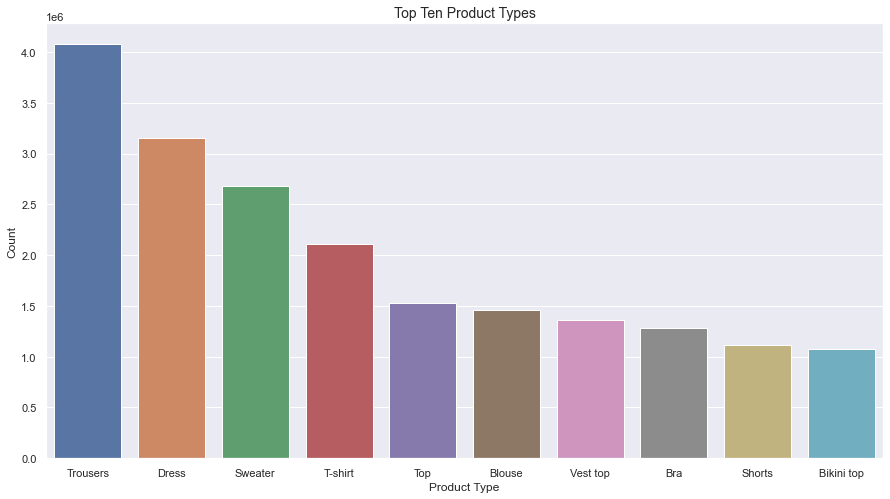

In [41]:
product_type_counts_df = df_transactions_merged[df_transactions_merged['value_group']=='top25']['product_type_name'].value_counts(ascending=False)
#product_type_counts_df
ax = sns.barplot(x=product_type_counts_df.index[0:10], y=product_type_counts_df[0:10])
print("There are", product_type_counts_df.shape, "Product Types in total")
ax.set_xlabel("Product Type", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
ax.set_title("Top Ten Product Types", fontsize = 14)
sns.set(rc = {'figure.figsize':(15,8)})

There are (124,) Product Types in total


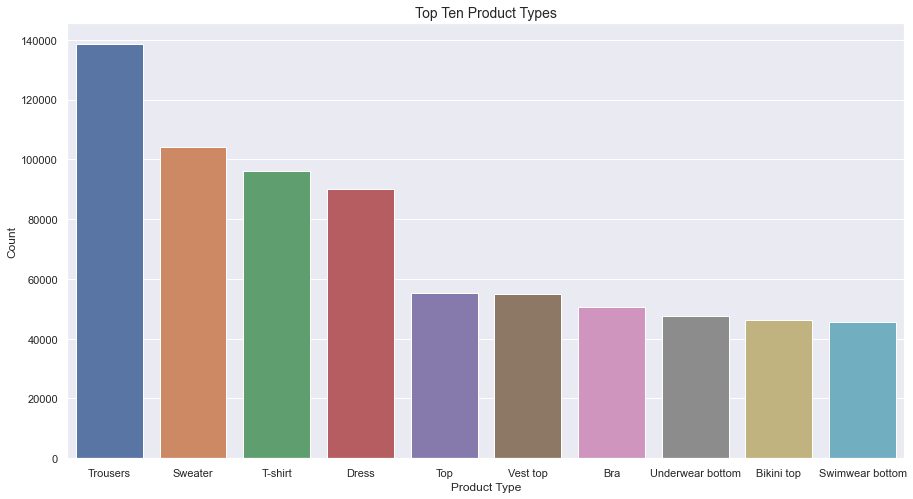

In [46]:
product_type_counts_df = df_transactions_merged[df_transactions_merged['value_group']!='top25']['product_type_name'].value_counts(ascending=False)
#product_type_counts_df
ax = sns.barplot(x=product_type_counts_df.index[0:10], y=product_type_counts_df[0:10])
print("There are", product_type_counts_df.shape, "Product Types in total")
ax.set_xlabel("Product Type", fontsize = 12)
ax.set_ylabel("Count", fontsize = 12)
ax.set_title("Top Ten Product Types", fontsize = 14)
sns.set(rc = {'figure.figsize':(15,8)})

In [35]:
df_plot = pd.DataFrame(columns=['Ladieswear','Divided','Menswear','Sport','Baby/Children'])
df_plot.loc[0,:] = df_transactions_merged[df_transactions_merged['value_group']!='top25']['index_group_name'].value_counts().values
df_plot.loc[1,:] = df_transactions_merged[df_transactions_merged['value_group']=='top25']['index_group_name'].value_counts().values
df_plot

,Ladieswear,Divided,Menswear,Sport,Baby/Children
0,680429,278533,98044,70181,42923
1,19734831,6859721,1700872,1203485,1119305


In [36]:
df_plot1 = df_plot.copy()
df_plot1['sample_size'] = df_plot.sum(axis=1)
df_plot1 = df_plot1.iloc[:,:-1].div(df_plot1['sample_size'], axis=0)
df_plot1['group'] = ['bottom75','top25']
df_plot1

,Ladieswear,Divided,Menswear,Sport,Baby/Children,group
0,0.581509,0.23804,0.08379,0.059978,0.036683,bottom75
1,0.644545,0.224041,0.055551,0.039306,0.036557,top25


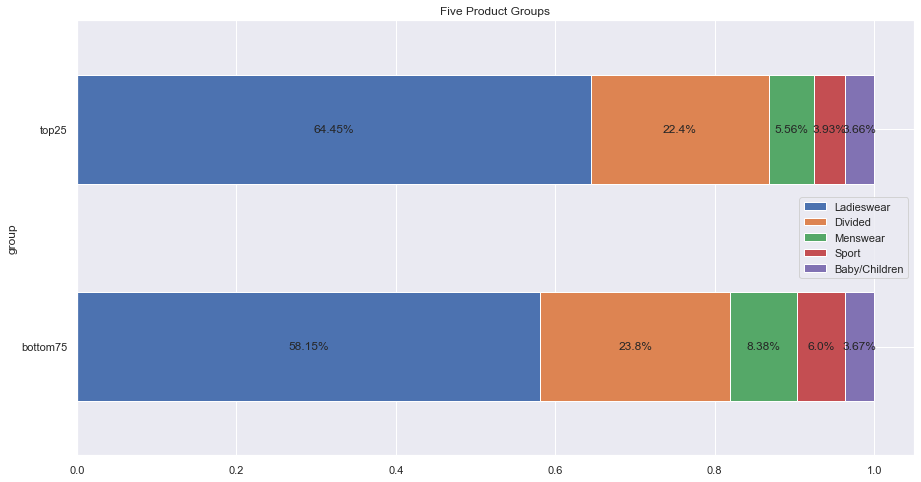

In [37]:
df_plot1.plot(
  x = 'group', 
  kind = 'barh', 
  stacked = True, 
  title = 'Five Product Groups', 
  mark_right = True)

for n in df_plot1.columns[:-1]:
    for i, (cs, ab, pc) in enumerate(zip(df_plot1.iloc[:, :-1].cumsum(1)[n], 
                                         df_plot1[n], df_plot1[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc*100, 2)) + '%', 
                 va = 'center', ha = 'center')

## Perchase habit - Top Associations

In [3]:
df_transactions_merged = load_pkl(path+'df_transactions_merged.pkl')

In [4]:
np.random.randint(1,12,3)

array([3, 8, 1])

In [5]:
np.random.randint(1,31,4)

array([ 3,  6,  2, 21])

In [53]:
df_transactions_sample = df_transactions_merged[(df_transactions_merged['day'].isin([12, 15, 19, 20])) & (df_transactions_merged['month'].isin([11,  2,  6])) & (df_transactions_merged['frequency_group']!='top25')]
df_transactions_sample

,customer_id,article_id,price,sales_channel_id,year,month,day,product_type_name,graphical_appearance_name,colour_group_name,value_group,frequency_group
2387847,-6859984547830741869,673677001,0.016932,1,18,11,12,Sweater,Melange,Grey,bottom75,middle
2387848,-6859984547830741869,551080020,0.006085,1,18,11,12,T-shirt,Placement print,Light Purple,bottom75,middle
2387849,-6859984547830741869,648414023,0.038119,1,18,11,12,Hoodie,Front print,Dark Green,bottom75,middle
2387850,-6859984547830741869,673677004,0.016932,1,18,11,12,Sweater,Melange,Light Beige,bottom75,middle
2387861,6823799502827656762,547367020,0.016932,2,18,11,12,Bra,Solid,Dark Red,top25,middle
...,...,...,...,...,...,...,...,...,...,...,...,...
27675018,8641086703813396878,816521005,0.012186,2,20,6,20,Trousers,Stripe,Black,top25,middle
27675023,-2513845744226708443,698286007,0.022864,2,20,6,20,Bikini top,Other structure,White,top25,middle
27675024,-2513845744226708443,559601003,0.012186,2,20,6,20,Swimwear bottom,All over pattern,White,top25,middle
27675025,-2513845744226708443,742912002,0.004559,2,20,6,20,Bikini top,Solid,Black,top25,middle


In [56]:
perchase_dict_bottom75 = {}
for ind, row in df_transactions_sample.iterrows():
    if str(row['customer_id'])+'#'+str(row['year'])+str(row['month'])+str(row['day']) not in perchase_dict_bottom75:
        perchase_dict_bottom75[str(row['customer_id'])+'#'+str(row['year'])+str(row['month'])+str(row['day'])] = []
    perchase_dict_bottom75[str(row['customer_id'])+'#'+str(row['year'])+str(row['month'])+str(row['day'])].append(row['product_type_name'])

In [57]:
df_associations = pd.DataFrame(columns = df_transactions_sample['product_type_name'].unique(),
                               index=df_transactions_sample['product_type_name'].unique())
df_associations = df_associations.fillna(0)
for perchase in perchase_dict_bottom75:
    for i in range(len(perchase_dict_bottom75[perchase])-1):
        for j in range(i+1,len(perchase_dict_bottom75[perchase])):
            df_associations.loc[perchase_dict_bottom75[perchase][i], perchase_dict_bottom75[perchase][j]]+=1
            df_associations.loc[perchase_dict_bottom75[perchase][j], perchase_dict_bottom75[perchase][i]]+=1
df_associations

,Sweater,T-shirt,Hoodie,Bra,Underwear bottom,Trousers,Top,Vest top,Leggings/Tights,Outdoor Waistcoat,...,Dog Wear,Shoulder bag,Headband,Keychain,Alice band,Bucket hat,Weekend/Gym bag,Mobile case,Stain remover spray,Marker pen
Sweater,19884,3942,1770,1114,964,8086,3325,1413,1414,43,...,1,0,1,0,0,1,0,2,0,0
T-shirt,3942,25130,958,1621,1161,6973,4320,4387,1808,15,...,0,0,0,1,0,1,0,2,0,0
Hoodie,1770,958,2352,291,220,1642,395,285,373,3,...,2,0,0,0,0,1,0,1,0,0
Bra,1114,1621,291,13004,6838,1839,1158,1712,1226,9,...,16,0,0,0,0,0,0,1,0,0
Underwear bottom,964,1161,220,6838,10774,1546,702,1156,508,3,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bucket hat,1,1,1,0,0,5,3,0,0,0,...,0,0,0,0,0,4,0,0,0,0
Weekend/Gym bag,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mobile case,2,2,1,1,1,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Stain remover spray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


In [58]:
df_associations1 = df_associations.copy()
df_associations1['sample_size'] = df_associations.sum(axis=1)
df_associations1 = df_associations1.iloc[:,:-1].div(df_associations1['sample_size'], axis=0)
df_associations1['sample_size'] = df_associations.sum(axis=1)
df_associations1

,Sweater,T-shirt,Hoodie,Bra,Underwear bottom,Trousers,Top,Vest top,Leggings/Tights,Outdoor Waistcoat,...,Shoulder bag,Headband,Keychain,Alice band,Bucket hat,Weekend/Gym bag,Mobile case,Stain remover spray,Marker pen,sample_size
Sweater,0.329565,0.065336,0.029337,0.018464,0.015978,0.134021,0.055110,0.023420,0.023436,0.000713,...,0.0,0.000017,0.000000,0.0,0.000017,0.000000,0.000033,0.0,0.0,60334
T-shirt,0.053247,0.339448,0.012940,0.021896,0.015682,0.094189,0.058353,0.059258,0.024422,0.000203,...,0.0,0.000000,0.000014,0.0,0.000014,0.000000,0.000027,0.0,0.0,74032
Hoodie,0.157333,0.085156,0.209067,0.025867,0.019556,0.145956,0.035111,0.025333,0.033156,0.000267,...,0.0,0.000000,0.000000,0.0,0.000089,0.000000,0.000089,0.0,0.0,11250
Bra,0.028350,0.041253,0.007406,0.330941,0.174021,0.046801,0.029470,0.043569,0.031201,0.000229,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000025,0.0,0.0,39294
Underwear bottom,0.029542,0.035579,0.006742,0.209549,0.330167,0.047377,0.021513,0.035425,0.015568,0.000092,...,0.0,0.000000,0.000000,0.0,0.000000,0.000031,0.000031,0.0,0.0,32632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Bucket hat,0.030303,0.030303,0.030303,0.000000,0.000000,0.151515,0.090909,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.121212,0.000000,0.000000,0.0,0.0,33
Weekend/Gym bag,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,3
Mobile case,0.095238,0.095238,0.047619,0.047619,0.047619,0.095238,0.047619,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,21
Stain remover spray,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,2


In [59]:
#df_associations1 = df_associations1[(df_associations1.iloc[:, :-1]>0.15).any(axis=1)]
df_associations1 = df_associations1[df_associations1['sample_size']>1000]
for ind, row in df_associations1.iterrows():
    for col in df_associations1.columns[:-1]:
        if row[col]>0.15:
            print(ind,col,row[col])

Sweater Sweater 0.32956541916663906
T-shirt T-shirt 0.33944780635400906
Hoodie Sweater 0.15733333333333333
Hoodie Hoodie 0.20906666666666668
Bra Bra 0.33094111060212755
Bra Underwear bottom 0.17402147910622487
Underwear bottom Bra 0.20954890904633489
Underwear bottom Underwear bottom 0.3301667075263545
Trousers Trousers 0.38343654576068037
Top Top 0.1936696821569972
Vest top Vest top 0.2845202343700779
Leggings/Tights Leggings/Tights 0.24882280049566294
Underwear Tights Underwear Tights 0.3410553410553411
Blouse Blouse 0.23720776075261962
Dress Dress 0.4198684997011357
Socks Socks 0.2756469076894843
Coat Coat 0.2096282754418038
Unknown Unknown 0.17363344051446947
Blazer Trousers 0.19565464679786146
Blazer Blazer 0.19315208736207484
Pyjama set Pyjama set 0.2223120452708165
Heeled sandals Dress 0.17100078802206461
Skirt Skirt 0.22484134179510426
Cardigan Cardigan 0.16110911915859927
Scarf Scarf 0.22939424031777558
Bikini top Bikini top 0.3136578317410339
Bikini top Swimwear bottom 0.4029

In [9]:
df_transactions_sample = df_transactions_merged[(df_transactions_merged['day'].isin([12, 15, 19, 20])) & (df_transactions_merged['month'].isin([11,  2,  6])) & (df_transactions_merged['frequency_group']=='top25')]
df_transactions_sample

,customer_id,article_id,price,sales_channel_id,year,month,day,product_type_name,graphical_appearance_name,colour_group_name,value_group,frequency_group
2387851,3314711751769941338,539723001,0.027119,2,18,11,12,Trousers,Solid,Black,top25,top25
2387852,3314711751769941338,656686002,0.134237,2,18,11,12,Coat,Solid,Dark Grey,top25,top25
2387853,3314711751769941338,678073002,0.020322,2,18,11,12,Dress,Melange,Black,top25,top25
2387854,3314711751769941338,644539003,0.013542,2,18,11,12,Earring,Solid,Light Beige,top25,top25
2387855,3314711751769941338,566147001,0.016254,2,18,11,12,Necklace,Solid,Gold,top25,top25
...,...,...,...,...,...,...,...,...,...,...,...,...
27675058,-9077814350058430802,855893002,0.013542,2,20,6,20,Bag,Solid,Black,top25,top25
27675059,7551062398649767985,739590033,0.016932,2,20,6,20,Swimwear bottom,All over pattern,Light Yellow,top25,top25
27675060,7551062398649767985,832321002,0.016932,2,20,6,20,Swimwear bottom,All over pattern,Dark Green,top25,top25
27675061,7551062398649767985,832320002,0.030492,2,20,6,20,Bikini top,Solid,Dark Green,top25,top25


In [10]:
perchase_dict_top25 = {}
for ind, row in df_transactions_sample.iterrows():
    if str(row['customer_id'])+'#'+str(row['year'])+str(row['month'])+str(row['day']) not in perchase_dict_top25:
        perchase_dict_top25[str(row['customer_id'])+'#'+str(row['year'])+str(row['month'])+str(row['day'])] = []
    perchase_dict_top25[str(row['customer_id'])+'#'+str(row['year'])+str(row['month'])+str(row['day'])].append(row['product_type_name'])

In [23]:
df_associations = pd.DataFrame(columns = df_transactions_sample['product_type_name'].unique(),
                               index=df_transactions_sample['product_type_name'].unique())
df_associations = df_associations.fillna(0)
for perchase in perchase_dict_top25:
    for i in range(len(perchase_dict_top25[perchase])-1):
        for j in range(i+1,len(perchase_dict_top25[perchase])):
            df_associations.loc[perchase_dict_top25[perchase][i], perchase_dict_top25[perchase][j]]+=1
            df_associations.loc[perchase_dict_top25[perchase][j], perchase_dict_top25[perchase][i]]+=1
df_associations

,Trousers,Coat,Dress,Earring,Necklace,Underwear bottom,Sweater,Hoodie,Cardigan,Bra,...,Wood balls,Mobile case,Towel,Moccasins,Cross-body bag,Washing bag,Bumbag,Marker pen,Zipper head,Chem. cosmetics
Trousers,222586,1602,55065,2062,1327,10618,47862,7626,5758,14378,...,5,5,5,5,0,0,0,0,2,1
Coat,1602,1654,1232,56,26,155,1348,155,156,230,...,0,0,0,0,0,0,0,0,0,0
Dress,55065,1232,227580,2325,1325,8585,23533,2632,4083,13452,...,1,4,2,3,0,4,2,0,1,0
Earring,2062,56,2325,2366,757,567,1487,141,173,810,...,0,5,0,2,0,0,0,0,0,0
Necklace,1327,26,1325,757,1450,415,967,101,122,496,...,0,6,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washing bag,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bumbag,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Marker pen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zipper head,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0


In [50]:
df_associations1 = df_associations.copy()
df_associations1['sample_size'] = df_associations.sum(axis=1)
df_associations1 = df_associations1.iloc[:,:-1].div(df_associations1['sample_size'], axis=0)
df_associations1['sample_size'] = df_associations.sum(axis=1)
df_associations1

,Trousers,Coat,Dress,Earring,Necklace,Underwear bottom,Sweater,Hoodie,Cardigan,Bra,...,Mobile case,Towel,Moccasins,Cross-body bag,Washing bag,Bumbag,Marker pen,Zipper head,Chem. cosmetics,sample_size
Trousers,0.331532,0.002386,0.082017,0.003071,0.001977,0.015815,0.071288,0.011359,0.008576,0.021415,...,0.000007,0.000007,0.000007,0.0,0.000000,0.000000,0.0,0.000003,0.000001,671387
Coat,0.126931,0.131051,0.097615,0.004437,0.002060,0.012281,0.106806,0.012281,0.012360,0.018224,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,12621
Dress,0.087075,0.001948,0.359876,0.003677,0.002095,0.013576,0.037213,0.004162,0.006457,0.021272,...,0.000006,0.000003,0.000005,0.0,0.000006,0.000003,0.0,0.000002,0.000000,632384
Earring,0.087137,0.002366,0.098251,0.099983,0.031990,0.023960,0.062838,0.005958,0.007311,0.034229,...,0.000211,0.000000,0.000085,0.0,0.000000,0.000000,0.0,0.000000,0.000000,23664
Necklace,0.082540,0.001617,0.082416,0.047086,0.090191,0.025813,0.060148,0.006282,0.007588,0.030852,...,0.000373,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,16077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washing bag,0.000000,0.000000,0.363636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,11
Bumbag,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4
Marker pen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,10
Zipper head,0.076923,0.000000,0.038462,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.230769,0.000000,26


In [52]:
#df_associations1 = df_associations1[(df_associations1.iloc[:, :-1]>0.15).any(axis=1)]
df_associations1 = df_associations1[df_associations1['sample_size']>1000]
for ind, row in df_associations1.iterrows():
    for col in df_associations1.columns[:-1]:
        if row[col]>0.15:
            print(ind,col,row[col])

Trousers Trousers 0.33153159057294823
Dress Dress 0.3598762777046858
Underwear bottom Underwear bottom 0.254319076188633
Underwear bottom Bra 0.16996322817882717
Sweater Sweater 0.2950184251545581
Hoodie Hoodie 0.17189751520050608
Bra Bra 0.27180737801881816
Skirt Skirt 0.18004339568532177
Vest top Vest top 0.22354906940199049
Top Top 0.16032942605862294
Socks Socks 0.3647048993120352
Blouse Blouse 0.2292146378277695
Shirt Shirt 0.19080975797224237
Blazer Trousers 0.16840037577931505
T-shirt T-shirt 0.2783273738577672
Bikini top Bikini top 0.2797605927533529
Bikini top Swimwear bottom 0.2973346445344953
Swimwear bottom Bikini top 0.29424768552504077
Swimwear bottom Swimwear bottom 0.27219148373889956
Shorts Shorts 0.2706690259210142
Swimsuit Swimsuit 0.21697246880458074
Hat/beanie Hat/beanie 0.16434592569466125
Underwear Tights Underwear Tights 0.24731564468896974
Leggings/Tights Leggings/Tights 0.19607920246966987
Polo shirt Polo shirt 0.20236558029027427
Jumpsuit/Playsuit Dress 0.166